In [5]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

from moviepy.editor import VideoFileClip
from moviepy.editor import ipython_display

import numpy as np
import pandas as pd

from IPython.display import Audio

In [4]:
## Load and display the video
video_path = "data/video_data/498ynMnZ6Lo_30000/video.mp4"

video = VideoFileClip(video_path)

video.ipython_display(width=280, height=320)

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [9]:
# Store the audio in a temporary 
audio = video.audio

audio.ipython_display()

MoviePy - Writing audio in __temp__.mp3


MoviePy - Done.


**MelSpectogram**

MoviePy - Writing audio in temp_audio.wav


MoviePy - Done.


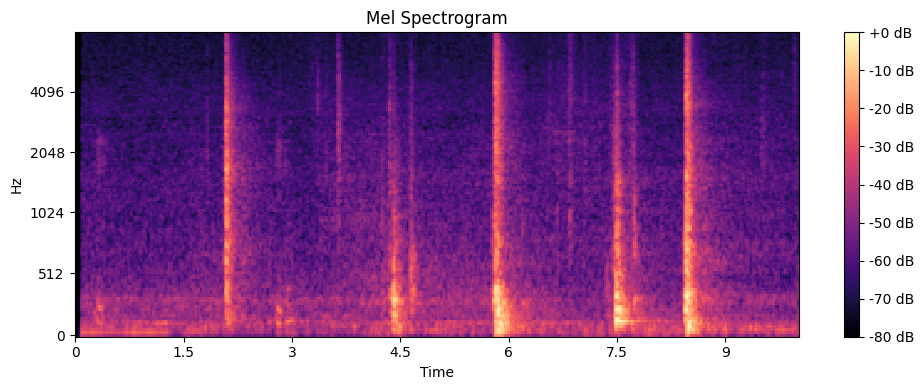

In [25]:
def display_melspectogram(y, sr):
    # Create the Mel Spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    S_DB = librosa.power_to_db(S, ref=np.max)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.tight_layout()
    plt.show()

# Extract audio to a temporary WAV file (required for processing with librosa)
audio_file = 'temp_audio.wav'
audio.write_audiofile(audio_file, codec='pcm_s16le')
samples, sample_rate = librosa.load(audio_file)

display_melspectogram(samples, sample_rate)

In [33]:
## Saving (just) the melspectogram as an image
plt.imsave('mel_spectrogram_simple.png', S_DB, cmap='inferno', format='png')

**Waveform**

In [29]:
def display_waveform(y, sr, x_axis = 'time'):
    
    plt.figure(figsize=(14, 5))
    
    if x_axis == 'time':
        duration = len(y) / sr 
        time = np.linspace(0, duration, len(y))
        plt.plot(time, y)
        plt.xlabel('Time (Seconds)')
    else:
        plt.plot(y)
        plt.xlabel('Samples')

    plt.title('Waveform')
    plt.ylabel('Amplitude')
    plt.grid(True, alpha=0.2)
    plt.show()

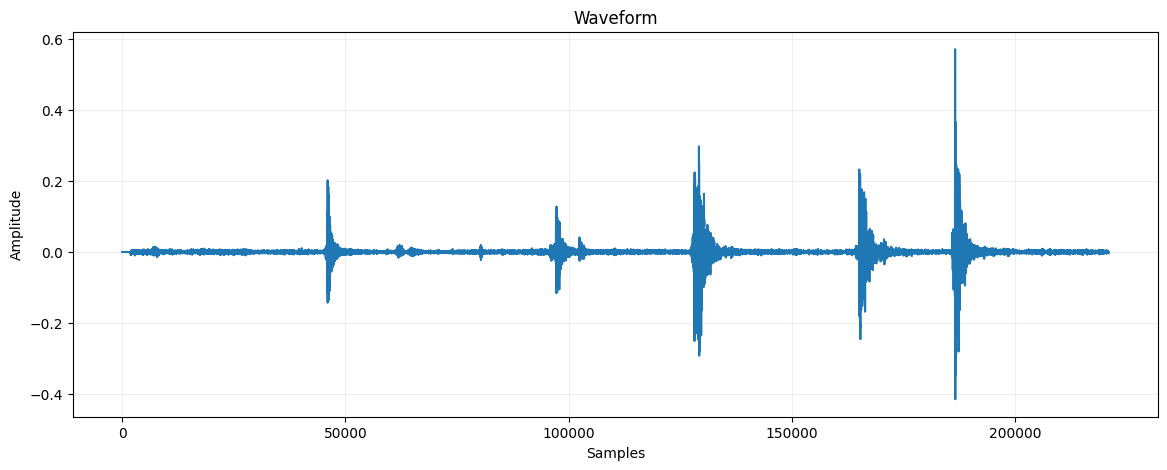

In [30]:
display_waveform(samples, sample_rate, x_axis='samples')

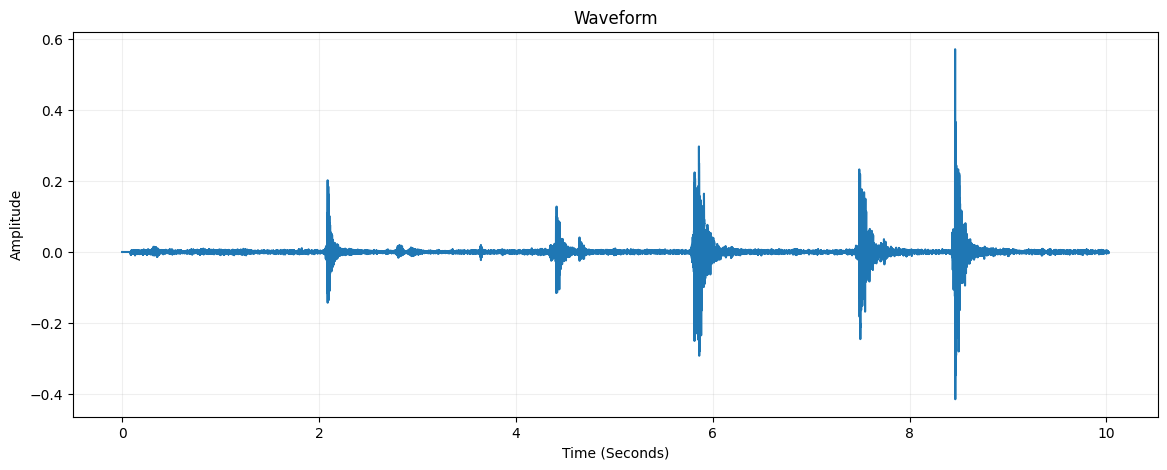

In [31]:
display_waveform(samples, sample_rate, x_axis='time')

**Read the labels**

In [37]:
metadata_df = pd.read_csv('data/video_data/498ynMnZ6Lo_30000/metadata.csv')

ontology = pd.read_json('data/ontology.json')
ontology = ontology[['id','name']]

metadata_df = pd.merge(metadata_df, ontology, how='left', left_on = 'label', right_on='id')
metadata_df = metadata_df.drop(columns=['id'])

metadata_df

segment_id  start_time_seconds  end_time_seconds       label  \
0   498ynMnZ6Lo_30000               0.000            10.000    /m/07yv9   
1   498ynMnZ6Lo_30000               0.976             1.047  /t/dd00109   
2   498ynMnZ6Lo_30000               1.134             1.205  /t/dd00109   
3   498ynMnZ6Lo_30000               1.276             1.630   /m/05zppz   
4   498ynMnZ6Lo_30000               2.331             2.480  /m/07qcpgn   
5   498ynMnZ6Lo_30000               2.559             2.724  /m/07qcpgn   
6   498ynMnZ6Lo_30000               4.331             4.441  /m/07qcpgn   
7   498ynMnZ6Lo_30000               4.858             4.953  /m/07qcpgn   
8   498ynMnZ6Lo_30000               5.118             5.165  /m/07qcpgn   
9   498ynMnZ6Lo_30000               5.228             5.346  /m/07qcpgn   
10  498ynMnZ6Lo_30000               5.559             5.937  /m/07rjzl8   
11  498ynMnZ6Lo_30000               9.488             9.543  /m/07qcpgn   

                         name  
0                     Vehicle  
1             Surface contact  
2             Surface contact  
3   Male speech, man speaking  
4                         Tap  
5                         Tap  
6                         Tap  
7                         Tap  
8                         Tap  
9                         Tap  
10                       Slam  
11                        Tap

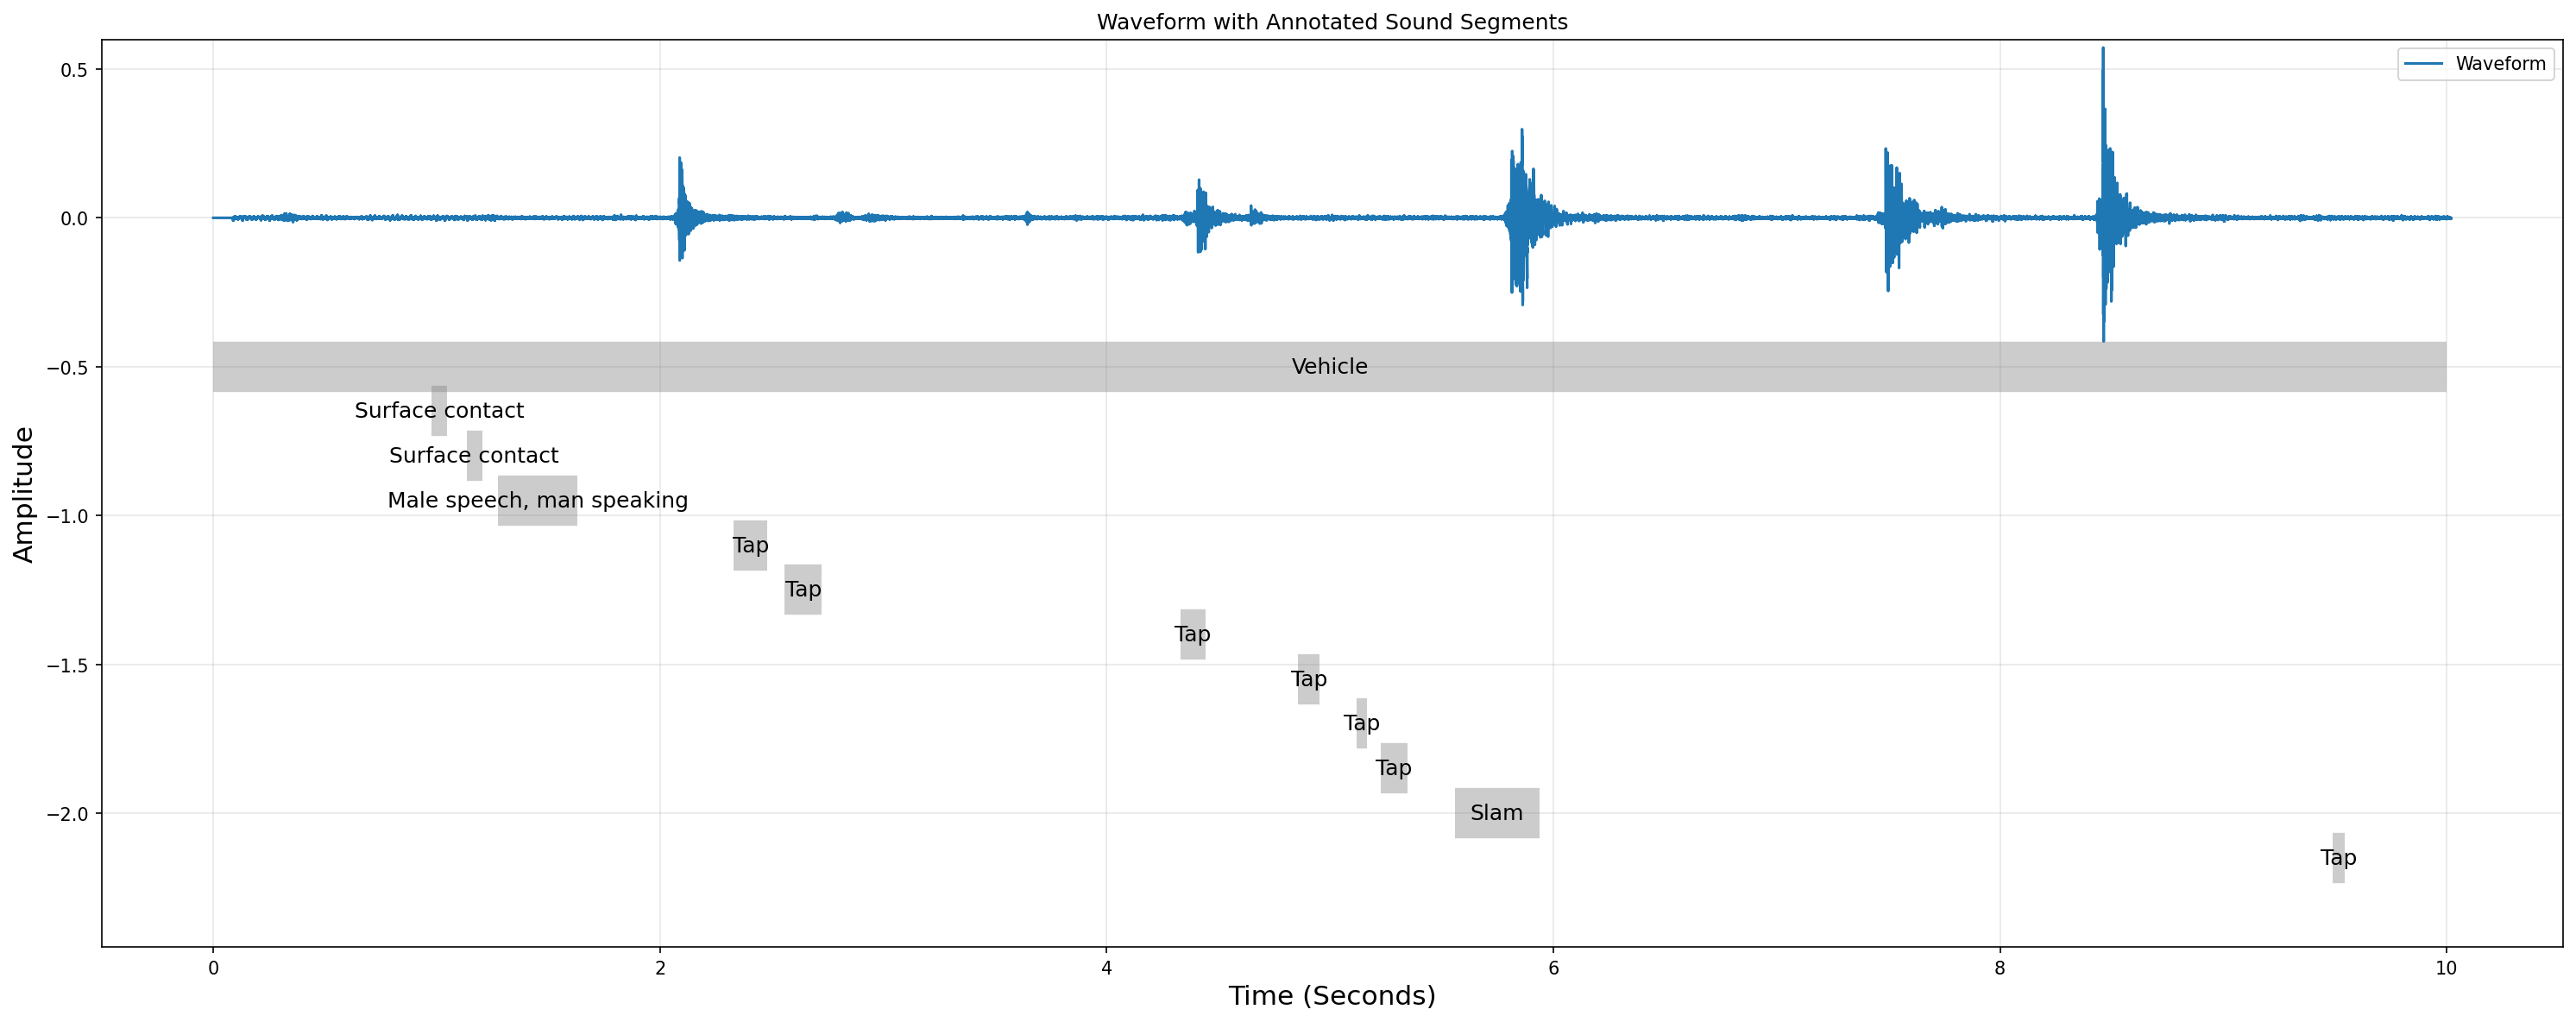

In [65]:
def fancy_plot(y, time):
    fig, ax = plt.subplots(figsize=(20, 8), dpi=150)
    ax.plot(time, y, label='Waveform')
    ax.set_xlabel('Time (Seconds)', fontsize=15)
    ax.set_ylabel('Amplitude', fontsize=15)


    bar_y_position = -0.5
    bar_height = 0.2
    y_pos_increment = -0.15  

    for index, row in metadata_df.iterrows():
        start_time = row['start_time_seconds']
        end_time = row['end_time_seconds']
        label = row['name']
        
        # Adjust y position for each segment
        current_y_pos = bar_y_position + (index * y_pos_increment)

        ax.hlines(current_y_pos, start_time, end_time, colors='grey', lw=28, alpha=0.4) 

        ax.text((start_time + end_time) / 2, current_y_pos, label, ha='center', va='center', fontsize=12, color='black')


    ax.set_ylim(top=0.6, bottom=current_y_pos + 2*y_pos_increment) 

    ax.set_title('Waveform with Annotated Sound Segments')
    ax.legend(loc='upper right')
    plt.tight_layout()
    plt.grid(True, alpha=0.3)
    plt.show()


y, sr = librosa.load(audio_file)
duration = len(y) / sr 
time = np.linspace(0, duration, len(y))
fancy_plot(y, time)